# English-Malay Semantic Retrieval

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense,Input,Flatten,Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping

## Data Pre-processing

### Loading the training dataset

In [2]:
#Initializing the training list
en_train = []
my_train = []
cl_train = []


#Loading english training dataset
file = open("train_en.txt",encoding="utf8")
en_train = file.readlines()
print("English training dataset contains ",len(en_train)," lines")
file.close()

#Loading malay training dataset
file = open("train_my.txt",encoding="utf8")
my_train = file.readlines()
print("Malay training dataset contains ",len(my_train)," lines")
file.close()

#Loading the classification training dataset
file = open("train_cl.txt",encoding="utf8")
cl_train = file.readlines()
print("Classification training dataset contains ",len(cl_train)," lines")
file.close()



English training dataset contains  150000  lines
Malay training dataset contains  150000  lines
Classification training dataset contains  150000  lines


### Loading the testing dataset

In [3]:
#Initializing the testing list
en_test = []
my_test = []
cl_test = []

#Loading english testing dataset
file = open("test_en.txt",encoding="utf8")
en_test = file.readlines()
print("English testing dataset contains ",len(en_test)," lines")
file.close()

#Loading malay testing dataset
file = open("test_my.txt",encoding="utf8")
my_test = file.readlines()
print("Malay testing dataset contains ",len(my_test)," lines")
file.close()

#Loading the classification testing dataset
file = open("test_cl.txt",encoding="utf8")
cl_test = file.readlines()
print("Classification testing dataset contains ",len(cl_test)," lines")
file.close()

English testing dataset contains  40000  lines
Malay testing dataset contains  40000  lines
Classification testing dataset contains  40000  lines


### Loading the validation dataset

In [4]:
#Initializing the validation list
en_dev = []
my_dev = []
cl_dev = []

#Loading english validation dataset
file = open("dev_en.txt",encoding="utf8")
en_dev = file.readlines()
print("English validation dataset contains ",len(en_dev)," lines")
file.close()

#Loading malay validation dataset
file = open("dev_my.txt",encoding="utf8")
my_dev = file.readlines()
print("Malay validation dataset contains ",len(my_dev)," lines")
file.close()

#Loading the classification validation dataset
file = open("dev_cl.txt",encoding="utf8")
cl_dev = file.readlines()
print("Classification validation dataset contains ",len(cl_dev)," lines")
file.close()

English validation dataset contains  45930  lines
Malay validation dataset contains  45930  lines
Classification validation dataset contains  45930  lines


### Tokenizing English dataset

In [5]:
#Tokenizing training dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(en_train)
en_train_seq = tokenizer.texts_to_sequences(en_train)
en_train_index = tokenizer.word_index
print("Total unique word in the English training dataset is ", len(en_train_index))
max_en_train = max(len(sentences) for sentences in en_train_seq)
print("Length of longest sentence in input is ", max_en_train ,"\n")

#Tokenizing testing dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(en_test)
en_test_seq = tokenizer.texts_to_sequences(en_test)
en_test_index = tokenizer.word_index
print("Total unique word in the English testing dataset is ", len(en_test_index))
max_en_test = max(len(sentences) for sentences in en_test_seq)
print("Length of longest sentence in input is ", max_en_test,"\n")

#Tokenizing validation dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(en_dev)
en_dev_seq = tokenizer.texts_to_sequences(en_dev)
en_dev_index = tokenizer.word_index
print("Total unique word in the English validation dataset is ", len(en_dev_index))
max_en_dev = max(len(sentences) for sentences in en_dev_seq)
print("Length of longest sentence in input is ", max_en_dev)

Total unique word in the English training dataset is  39908
Length of longest sentence in input is  136 

Total unique word in the English testing dataset is  23413
Length of longest sentence in input is  77 

Total unique word in the English validation dataset is  11580
Length of longest sentence in input is  82


### Tokenizing Malay dataset

In [7]:
#Tokenizing training dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(my_train)
my_train_seq = tokenizer.texts_to_sequences(my_train)
my_train_index = tokenizer.word_index
print("Total unique word in the Malay training dataset is ", len(my_train_index))
max_my_train = max(len(sentences) for sentences in my_train_seq)
my_train_numWords = len(my_train_index)+1
print("Number of words in Malay training dataset: ",my_train_numWords)
print("Length of longest sentence in input is ", max_my_train ,"\n")


#Tokenizing testing dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(my_test)
my_test_seq = tokenizer.texts_to_sequences(my_test)
my_test_index = tokenizer.word_index
print("Total unique word in the Malay testing dataset is ", len(my_test_index))
my_test_numWords = len(my_test_index)+1
print("Number of words in Malay testing dataset: ",my_test_numWords)
max_my_test = max(len(sentences) for sentences in my_test_seq)
print("Length of longest sentence in input is ", max_my_test,"\n")


#Tokenizing validation dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(my_dev)
my_dev_seq = tokenizer.texts_to_sequences(my_dev)
my_dev_index = tokenizer.word_index
print("Total unique word in the Malay validation dataset is ", len(my_dev_index))
my_dev_numWords = len(my_dev_index)+1
print("Number of words in Malay validation dataset: ",my_dev_numWords)
max_my_dev = max(len(sentences) for sentences in my_dev_seq)
print("Length of longest sentence in input is ", max_my_dev)

Total unique word in the Malay training dataset is  23279
Number of words in Malay training dataset:  23280
Length of longest sentence in input is  286 

Total unique word in the Malay testing dataset is  13224
Number of words in Malay testing dataset:  13225
Length of longest sentence in input is  75 

Total unique word in the Malay validation dataset is  12562
Number of words in Malay validation dataset:  12563
Length of longest sentence in input is  77


### Initializing the parameters

In [15]:
BATCH_SIZE = 256
EPOCHS = 50
EMBEDDING_SIZE = 100

#Setting a max length based on the longest sentence in the dataset.
MAX_WORDS = 300

### Padding English Dataset

In [9]:
#Padding the english train dataset
en_train_padded = sequence.pad_sequences(en_train_seq, maxlen=MAX_WORDS)
print("The shape of English training input data: ",en_train_padded.shape)

#Padding the english test dataset
en_test_padded = sequence.pad_sequences(en_test_seq, maxlen=MAX_WORDS)
print("The shape of English testing input data: ",en_test_padded.shape)

#Padding the english dev dataset
en_dev_padded = sequence.pad_sequences(en_dev_seq, maxlen=MAX_WORDS)
print("The shape of English validation input data: ",en_dev_padded.shape)

The shape of English training input data:  (150000, 300)
The shape of English testing input data:  (40000, 300)
The shape of English validation input data:  (45930, 300)


### Padding Malay Dataset

In [10]:
#Padding the english train dataset
my_train_padded = sequence.pad_sequences(my_train_seq, maxlen=MAX_WORDS,padding='post')
print("The shape of Malay training input data: ",my_train_padded.shape)

#Padding the english test dataset
my_test_padded = sequence.pad_sequences(en_test_seq, maxlen=MAX_WORDS,padding='post')
print("The shape of Malay testing input data: ",my_test_padded.shape)

#Padding the english validation dataset
my_dev_padded = sequence.pad_sequences(en_dev_seq, maxlen=MAX_WORDS,padding='post')
print("The shape of Malay validation input data: ",my_dev_padded.shape)

The shape of Malay training input data:  (150000, 300)
The shape of Malay testing input data:  (40000, 300)
The shape of Malay validation input data:  (45930, 300)


## English Word Embeddings

In [11]:
embedding_dict = dict()

glove_dict = open("glove.6B.100d.txt",encoding="utf8")

for line in glove_dict:
    record=line.split()
    word=record[0]
    vector=np.asarray(record[1:])
    embedding_dict[word]=vector    
glove_dict.close()

num_words_en= len(en_train_index) + 1
embedding_matrix_en = np.zeros((num_words_en, EMBEDDING_SIZE))
for word, index in en_train_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix_en[index] = embedding_vector
        
print("Shape of the word embedding dictionary: ",embedding_matrix_en.shape)

Shape of the word embedding dictionary:  (39909, 100)


## Malay Word Embeddings

In [12]:
embedding_dict_my = dict()

dict_my = open("malay_dict.json",encoding="utf8")

for line in dict_my:
    record=line.split()
    word=record[0]
    vector=np.asarray(record[1:])
    embedding_dict_my[word]=vector 
    
dict_my.close()

num_words_my= len(my_train_index) + 1
embedding_matrix_my = np.zeros((num_words_my, EMBEDDING_SIZE))
for word, index in my_train_index.items():
    embedding_vector_my = embedding_dict_my.get(word)
    if embedding_vector_my is not None:
        embedding_matrix_my[index] = embedding_vector_my
        
print("Shape of the word embedding dictionary: ",embedding_matrix_my.shape)


Shape of the word embedding dictionary:  (23280, 100)


## Creating Model

### KERAS FUNCTIONAL API METHOD

In [21]:
input_en = Input(shape=(MAX_WORDS,))
input_my = Input(shape=(MAX_WORDS,))
embed_en = Embedding(num_words_en,EMBEDDING_SIZE, weights=[embedding_matrix_en], input_length=MAX_WORDS)(input_en)
embed_my = Embedding(num_words_my,EMBEDDING_SIZE,weights=[embedding_matrix_my], input_length=MAX_WORDS)(input_my)

lstm = LSTM(256, return_state=True)
outputs_en, state_h_en, state_c_en = lstm(embed_en)
outputs_my, state_h_my, state_c_my = lstm(embed_my)

flat_en = Flatten()(outputs_en)
flat_my = Flatten()(outputs_my)
merge = Concatenate(axis = 1)([flat_en, flat_my])

outputs = Dense(2, activation='sigmoid')(merge)
model = Model(inputs=[input_en, input_my], outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 300, 100)     3990900     ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 300, 100)     2328000     ['input_6[0][0]']                
                                                                                            

## Training the model

In [22]:
#Creating checkpoint save
checkpoint = ModelCheckpoint("saved_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', save_freq='epoch',period=1)

#Training the model
history = model.fit([en_train_padded,my_train_padded],to_categorical(cl_train),verbose=1, epochs=EPOCHS, batch_size=BATCH_SIZE,
                        validation_data=([en_dev_padded,my_dev_padded],to_categorical(cl_dev)),callbacks=[checkpoint])

Epoch 1/50
586/586 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.6987
Epoch 1: val_accuracy improved from -inf to 0.50353, saving model to saved_model.hdf5
586/586 [==============================] - 91s 150ms/step - loss: 0.5525 - accuracy: 0.6987 - val_loss: 0.9357 - val_accuracy: 0.5035
Epoch 2/50
586/586 [==============================] - ETA: 0s - loss: 0.4757 - accuracy: 0.7627
Epoch 2: val_accuracy improved from 0.50353 to 0.50464, saving model to saved_model.hdf5
586/586 [==============================] - 87s 148ms/step - loss: 0.4757 - accuracy: 0.7627 - val_loss: 0.9899 - val_accuracy: 0.5046
Epoch 3/50
586/586 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.7881
Epoch 3: val_accuracy did not improve from 0.50464
586/586 [==============================] - 87s 148ms/step - loss: 0.4432 - accuracy: 0.7881 - val_loss: 1.0115 - val_accuracy: 0.5040
Epoch 4/50
586/586 [==============================] - ETA: 0s - loss: 0.4217 - accur

## Performing model evaluation and prediction

In [24]:
#Evaluation model
evaluation = model.evaluate([en_dev_padded,my_dev_padded],to_categorical(cl_dev))
print('Test loss:',evaluation[0]) 
print('Test accuracy:',evaluation[1])
print("\n")

#predicting the output and accuracy
y_pred = model.predict([en_test_padded,my_test_padded])
pred = np.argmax(y_pred,axis=1)

#Changing the classification list to int array
y_true = np.array(cl_test,dtype=int)

print("Predicted classification: ", pred)
accuracy = accuracy_score(y_true, pred)
print("Accuracy: ", accuracy)
print("\n")

print("Confusion matrix:\n",confusion_matrix(y_true,pred))
print("\n")
print("Classification report:\n",classification_report(y_true,pred))

1436/1436 [==============================] - 21s 14ms/step - loss: 2.6326 - accuracy: 0.5044
Test loss: 2.6325674057006836
Test accuracy: 0.504376232624054


1250/1250 [==============================] - 17s 13ms/step
Predicted classification:  [1 1 1 ... 1 0 1]
Accuracy:  0.560375


Confusion matrix:
 [[11277  8723]
 [ 8862 11138]]


Classification report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56     20000
           1       0.56      0.56      0.56     20000

    accuracy                           0.56     40000
   macro avg       0.56      0.56      0.56     40000
weighted avg       0.56      0.56      0.56     40000



## Plotting the Model Accuracy and Model Loss

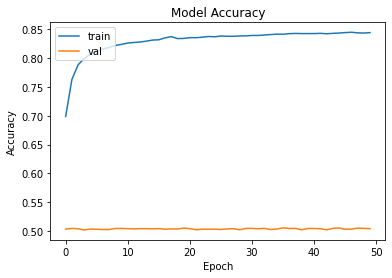

In [25]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

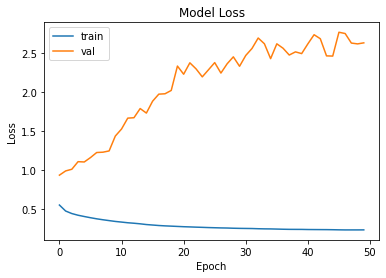

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()